In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
print(df['hotel'].value_counts())
print("---------------------------------------------")
print(df['is_canceled'].value_counts())
print("---------------------------------------------")
print(df['arrival_date_year'].value_counts())
print("---------------------------------------------")
print(df['arrival_date_month'].value_counts())
print("---------------------------------------------")
print(df['country'].value_counts())
print("---------------------------------------------")
print(df['market_segment'].value_counts())
print("---------------------------------------------")
print(df['distribution_channel'].value_counts())
print("---------------------------------------------")
print(df['deposit_type'].value_counts())


hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64
---------------------------------------------
is_canceled
0    63371
1    24025
Name: count, dtype: int64
---------------------------------------------
arrival_date_year
2016    42391
2017    31692
2015    13313
Name: count, dtype: int64
---------------------------------------------
arrival_date_month
August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: count, dtype: int64
---------------------------------------------
country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MRT        1
KIR        1
SDN        1
ATF        1
SLE        1
Name: count, Length: 178, dtype: int64
---------------------------------------------
market_segment
Online TA        51618
Offline TA/TO    13889
Direct           11804
G

In [5]:
# Creating new column total_night_stays

df['total_night_stays'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

In [6]:
# Creating revenue per customer

df['revenue'] = df['adr']*df['total_night_stays']

In [7]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_night_stays',
       'revenue'],
      dtype='object')


In [8]:
# Analyzing revenue by year and month

revenue_trend = df.groupby(['arrival_date_year', 'arrival_date_month'])['revenue'].sum().reset_index()


In [9]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December']
revenue_trend['arrival_date_month'] = pd.Categorical(revenue_trend['arrival_date_month'], categories=month_order, ordered=True)
revenue_trends = revenue_trend.sort_values(['arrival_date_year', 'arrival_date_month'])

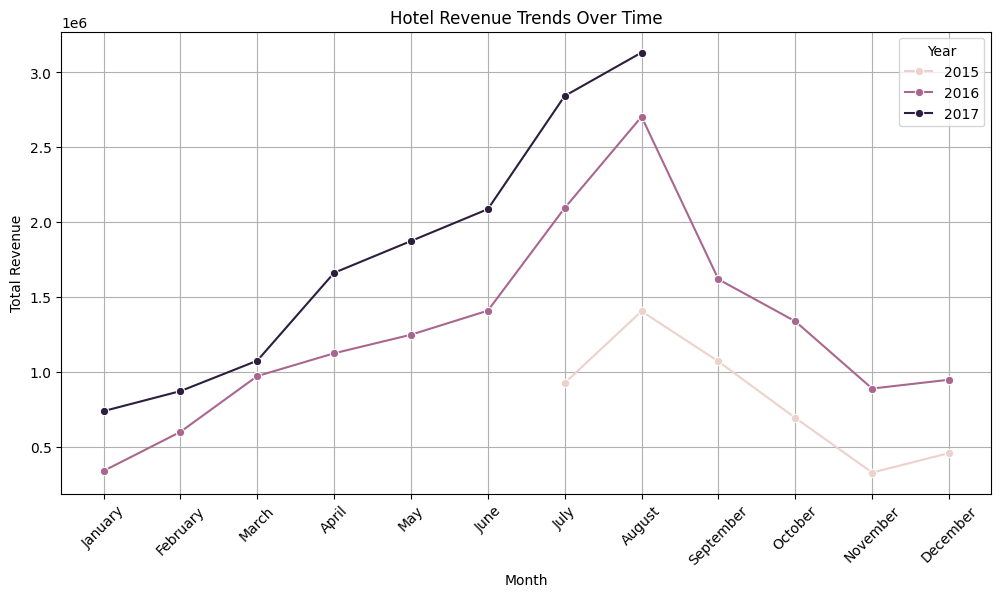

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_trends, x='arrival_date_month', y='revenue', hue='arrival_date_year', marker='o')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Hotel Revenue Trends Over Time")
plt.legend(title="Year")
plt.grid(True)
plt.show()

In [11]:
# Analyzing cancellation Rate

df['cancellation_rate'] = df['is_canceled'] * 100
cancellation_trends = df.groupby(['arrival_date_year', 'arrival_date_month'])['cancellation_rate'].mean().reset_index()

In [12]:
cancellation_trends['arrival_date_month'] = pd.Categorical(cancellation_trends['arrival_date_month'], 
                                                           categories=month_order, ordered=True)

cancellation_trends = cancellation_trends.sort_values(['arrival_date_year', 'arrival_date_month'])


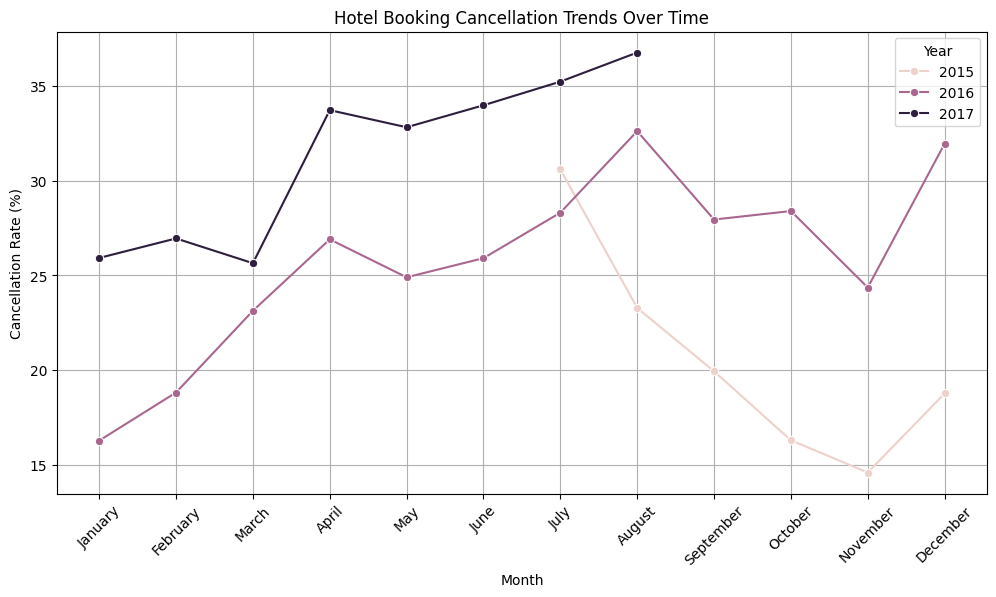

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=cancellation_trends, x='arrival_date_month', y='cancellation_rate', 
             hue='arrival_date_year', marker='o')

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.title("Hotel Booking Cancellation Trends Over Time")
plt.legend(title="Year")
plt.grid(True)
plt.show()

In [14]:
market_segment_cancellation = df.groupby("market_segment")["is_canceled"].mean() * 100
print(market_segment_cancellation)

market_segment
Aviation          19.823789
Complementary     12.535613
Corporate         12.108262
Direct            14.715351
Groups            27.013355
Offline TA/TO     14.853481
Online TA         35.346197
Undefined        100.000000
Name: is_canceled, dtype: float64


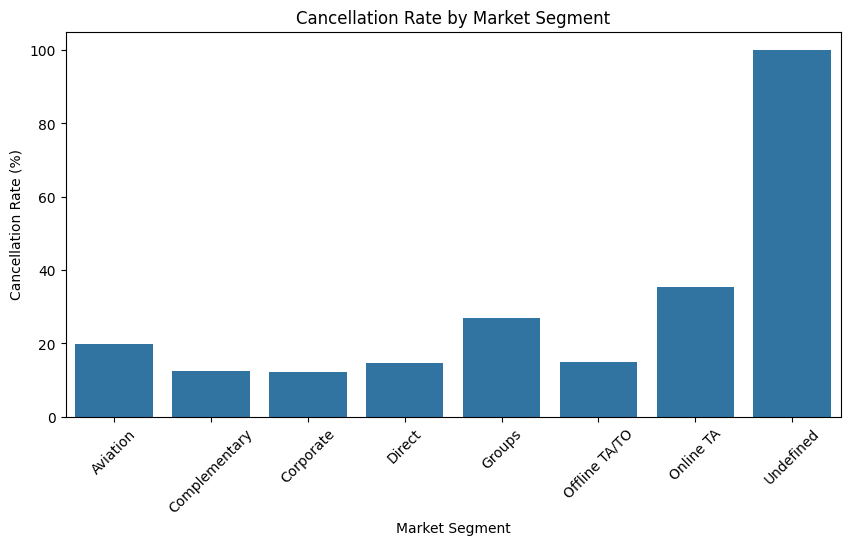

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=market_segment_cancellation.index, y=market_segment_cancellation.values)
plt.xticks(rotation=45)
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Market Segment")
plt.title("Cancellation Rate by Market Segment")
plt.show()

In [34]:
distribution_cancellation = df.groupby("distribution_channel")["is_canceled"].mean() * 100
print(distribution_cancellation)

distribution_channel
Corporate    12.753395
Direct       14.821374
GDS          19.889503
TA/TO        30.968600
Undefined    80.000000
Name: is_canceled, dtype: float64


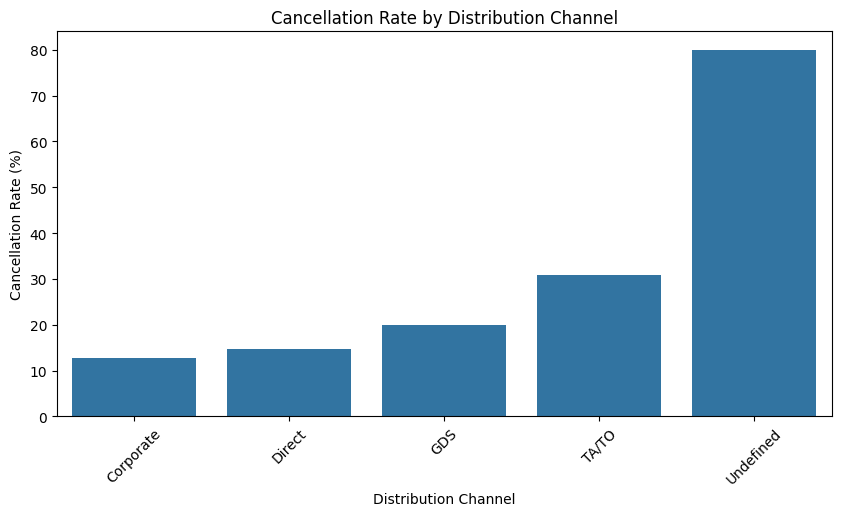

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x=distribution_cancellation.index, y=distribution_cancellation.values)
plt.xticks(rotation=45)
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Distribution Channel")
plt.title("Cancellation Rate by Distribution Channel")
plt.show()

In [36]:
deposit_cancellation = df.groupby("deposit_type")["is_canceled"].mean() * 100
print(deposit_cancellation)

deposit_type
No Deposit    26.684908
Non Refund    94.701349
Refundable    24.299065
Name: is_canceled, dtype: float64


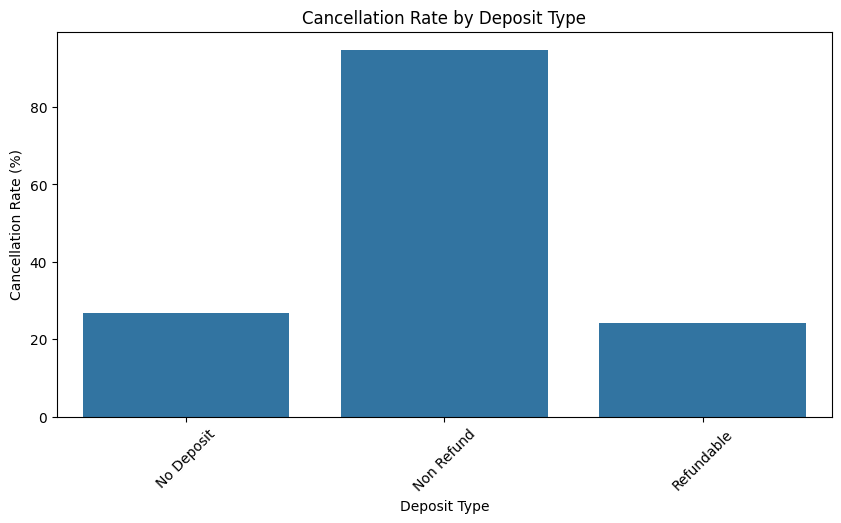

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=deposit_cancellation.index, y=deposit_cancellation.values)
plt.xticks(rotation=45)
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("Deposit Type")
plt.title("Cancellation Rate by Deposit Type")
plt.show()

In [15]:
# Analysis of customers by Geography
# Top 10 countries with most number customers
country_counts = df['country'].value_counts().head(10)
country_counts


country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: count, dtype: int64

C:\Users\Hp\AppData\Local\Temp\ipykernel_12732\1942558178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")


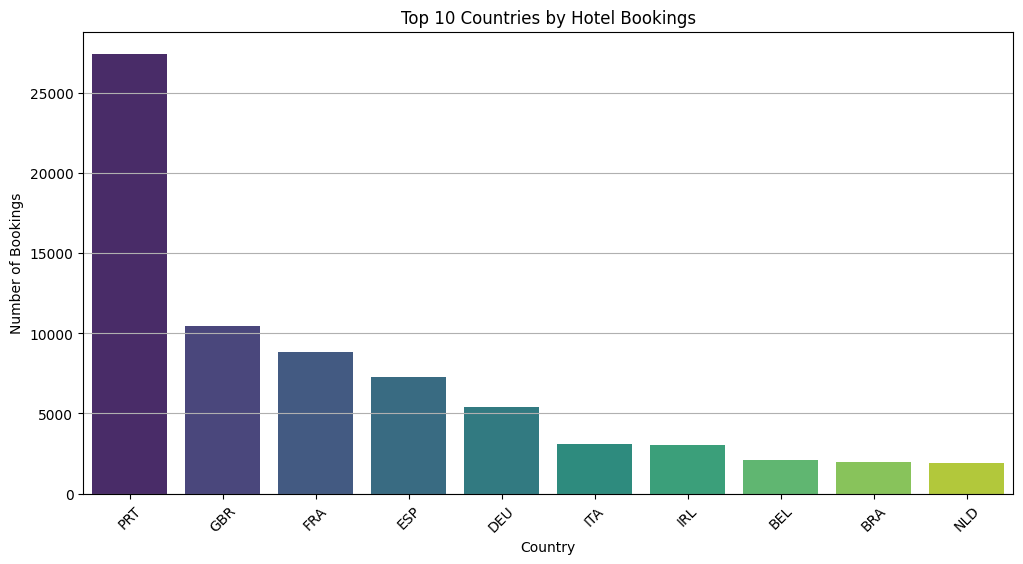

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")

plt.xlabel("Country")
plt.ylabel("Number of Bookings")
plt.title("Top 10 Countries by Hotel Bookings")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [17]:
import plotly.express as px

countries = df['country'].value_counts().reset_index()

countries.columns = ['country', 'num_bookings']

In [18]:
fig = px.choropleth(countries, 
                     locations="country", 
                     locationmode="ISO-3", 
                     color="num_bookings",
                     title="Hotel Bookings by Country",
                     color_continuous_scale="blues")

fig.write_html("hotel_bookings_map.html")

# Confirmation message
print("Map saved as 'hotel_bookings_map.html'. Open this file in a browser to view the visualization.")

Map saved as 'hotel_bookings_map.html'. Open this file in a browser to view the visualization.


In [19]:
# To see the file in browser
import webbrowser
webbrowser.open("hotel_bookings_map.html")

True

In [20]:
# Lead time Analysis

df['lead_time'].describe()

count    87396.000000
mean        79.891368
std         86.052325
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64

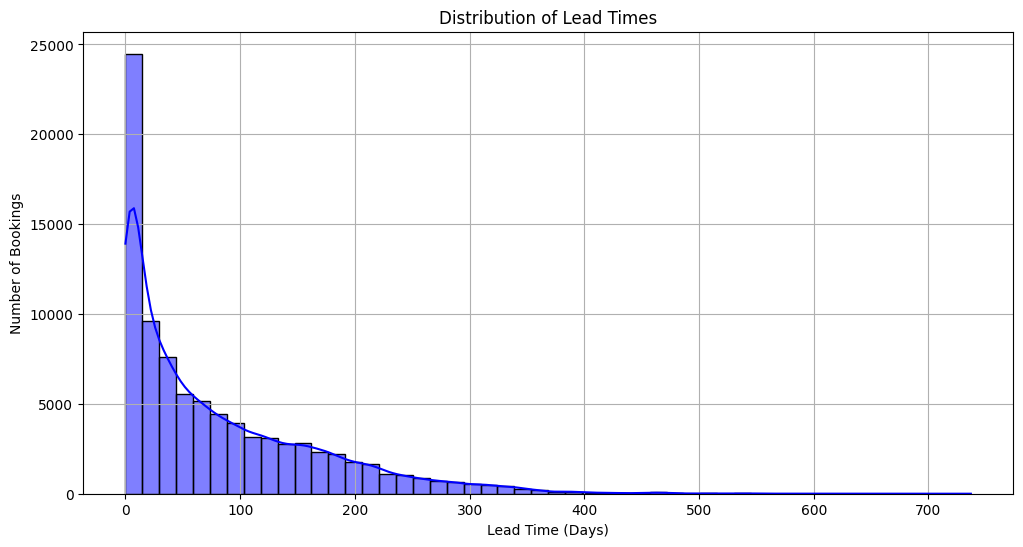

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=50, kde=True, color='blue')

plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.title("Distribution of Lead Times")
plt.grid(True)
plt.show()

In [22]:
# Market Segment Analysis

market_segments = df['market_segment'].value_counts()
print(market_segments)

market_segment
Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: count, dtype: int64


In [23]:
repeat_guest_ratio = df.groupby("market_segment")["is_repeated_guest"].mean() * 100
print(repeat_guest_ratio)

market_segment
Aviation         27.753304
Complementary    31.908832
Corporate        34.306743
Direct            6.590986
Groups            1.153379
Offline TA/TO     1.936785
Online TA         1.121702
Undefined         0.000000
Name: is_repeated_guest, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_12732\3498041221.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




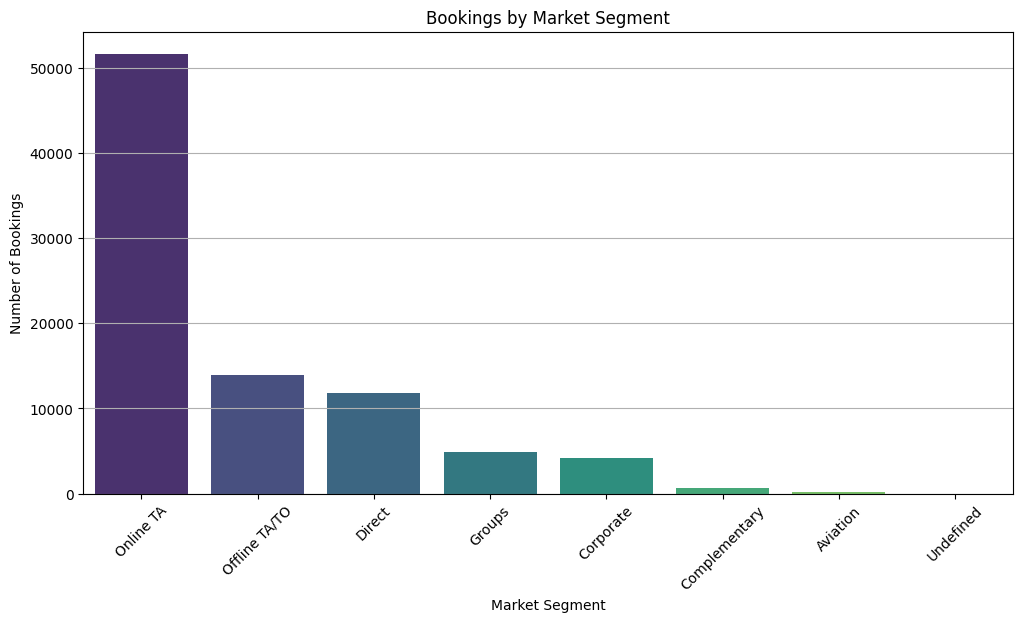

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=market_segments.index, y=market_segments.values, palette="viridis")

plt.xlabel("Market Segment")
plt.ylabel("Number of Bookings")
plt.title("Bookings by Market Segment")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_12732\2612810205.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




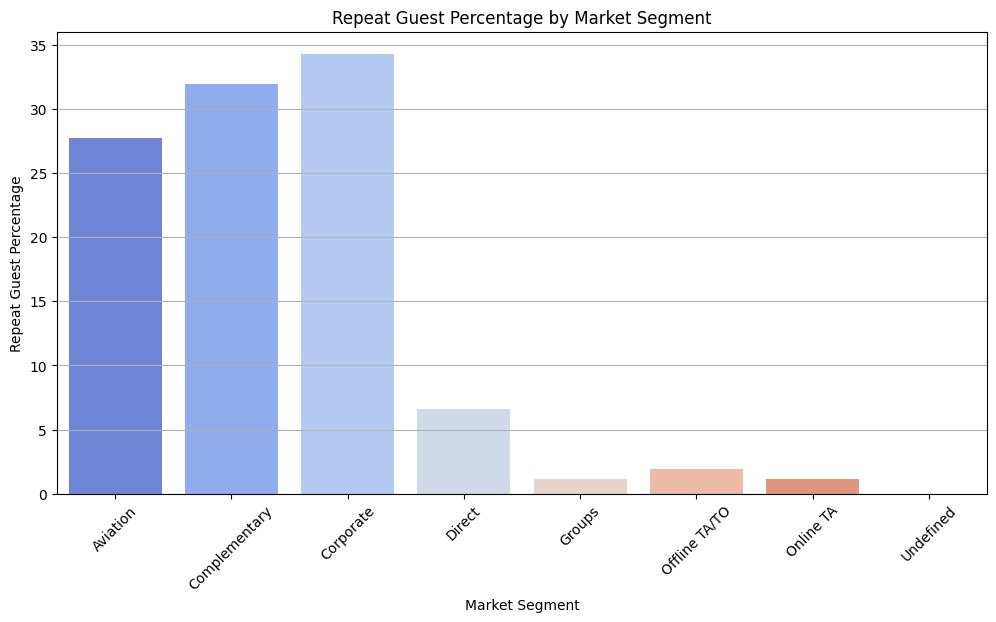

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x=repeat_guest_ratio.index, y=repeat_guest_ratio.values, palette="coolwarm")

plt.xlabel("Market Segment")
plt.ylabel("Repeat Guest Percentage")
plt.title("Repeat Guest Percentage by Market Segment")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [26]:
# Seasonal Demand Analysis
monthly_bookings = df['arrival_date_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'
])
print(monthly_bookings)


arrival_date_month
January       4693
February      6098
March         7513
April         7908
May           8355
June          7765
July         10057
August       11257
September     6690
October       6934
November      4995
December      5131
Name: count, dtype: int64


In [27]:
monthly_adr = df.groupby('arrival_date_month')['adr'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'
])
print(monthly_adr)

arrival_date_month
January       70.050742
February      74.692033
March         81.609523
April        103.612589
May          111.195703
June         119.750120
July         135.542014
August       150.876120
September    112.081263
October       90.152518
November      72.754460
December      81.450226
Name: adr, dtype: float64


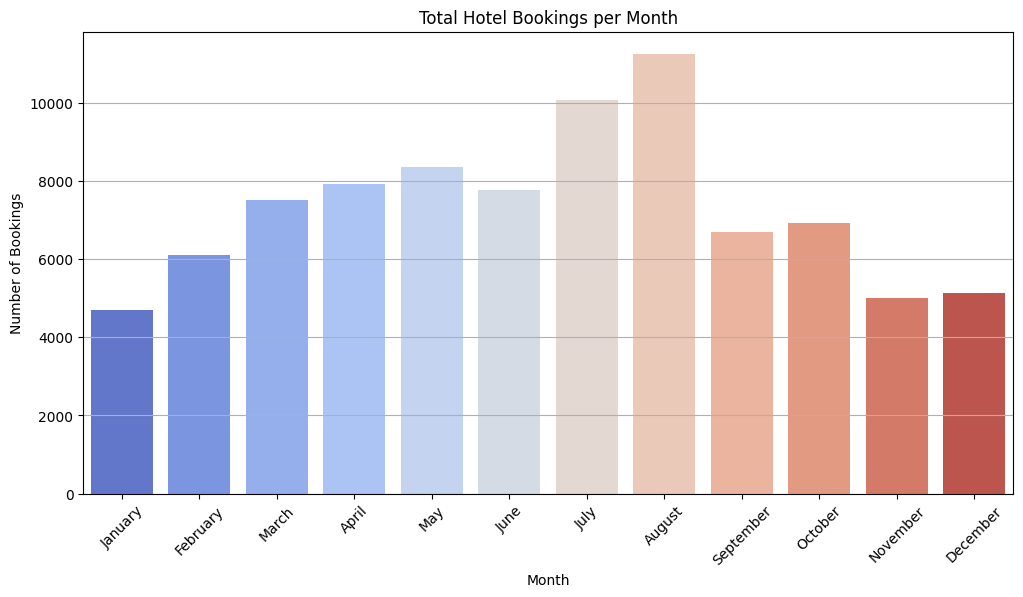

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values,hue = monthly_bookings.index,  palette="coolwarm")

plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.title("Total Hotel Bookings per Month")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

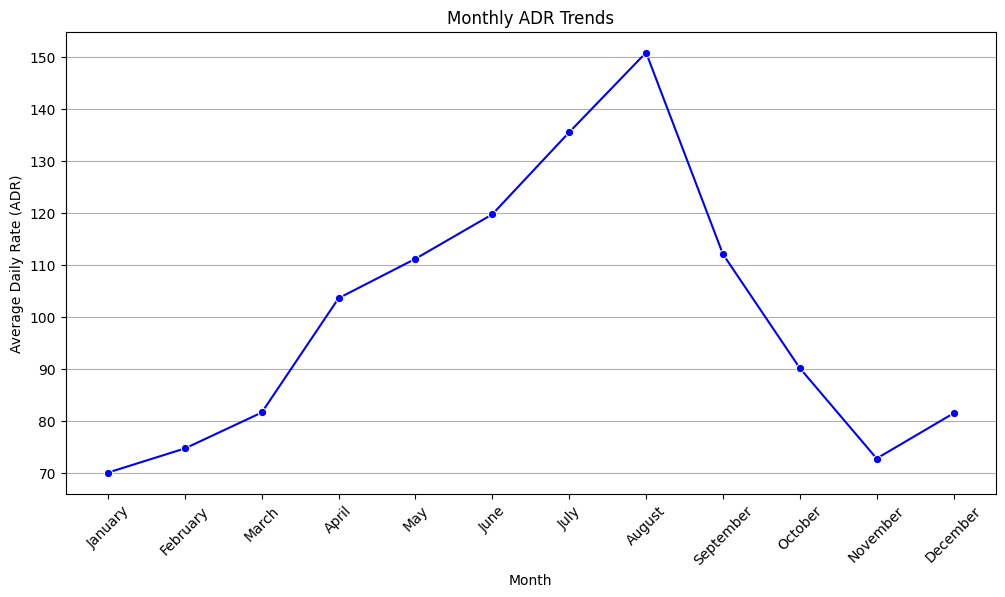

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_adr.index, y=monthly_adr.values, marker="o", color="blue")

plt.xlabel("Month")
plt.ylabel("Average Daily Rate (ADR)")
plt.title("Monthly ADR Trends")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [39]:
# Average Daily Rate (ADR) across different seasons

season_mapping = {
    "December": "Winter", "January": "Winter", "February": "Winter",
    "March": "Spring", "April": "Spring", "May": "Spring",
    "June": "Summer", "July": "Summer", "August": "Summer",
    "September": "Autumn", "October": "Autumn", "November": "Autumn"
}

df["season"] = df["arrival_date_month"].map(season_mapping)

print(df[["arrival_date_month", "season"]].head())

  arrival_date_month  season
0               July  Summer
1               July  Summer
2               July  Summer
3               July  Summer
4               July  Summer


In [40]:
seasonal_adr = df.groupby("season")["adr"].mean().sort_values()
print(seasonal_adr)

season
Winter     75.501901
Autumn     93.364291
Spring     99.324563
Summer    137.261192
Name: adr, dtype: float64


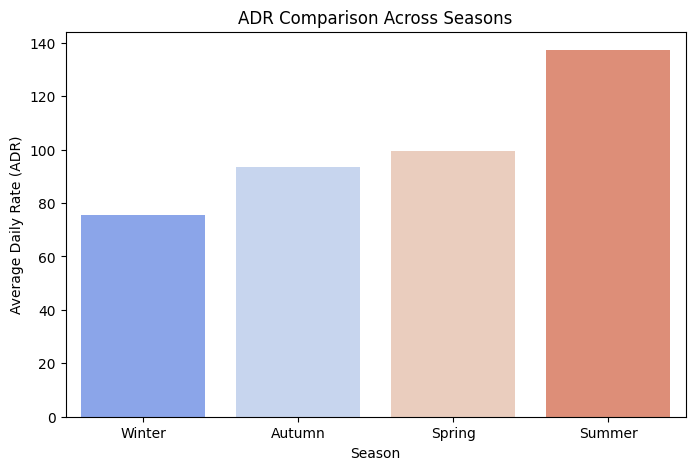

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x=seasonal_adr.index, y=seasonal_adr.values,hue = seasonal_adr.index, palette="coolwarm")
plt.ylabel("Average Daily Rate (ADR)")
plt.xlabel("Season")
plt.title("ADR Comparison Across Seasons")
plt.show()

In [30]:
# Lead time impact on cancellation rate

lead_time = df['lead_time'].describe()
print(lead_time)

count    87396.000000
mean        79.891368
std         86.052325
min          0.000000
25%         11.000000
50%         49.000000
75%        125.000000
max        737.000000
Name: lead_time, dtype: float64


In [31]:
lead_time_cancellation = df.groupby("lead_time")["is_canceled"].mean() * 100
print(lead_time_cancellation.head(10)) 

lead_time
0     5.904985
1     6.654229
2     9.444733
3     9.976526
4     9.808917
5    11.071932
6    12.384615
7    12.762385
8    18.056919
9    20.000000
Name: is_canceled, dtype: float64


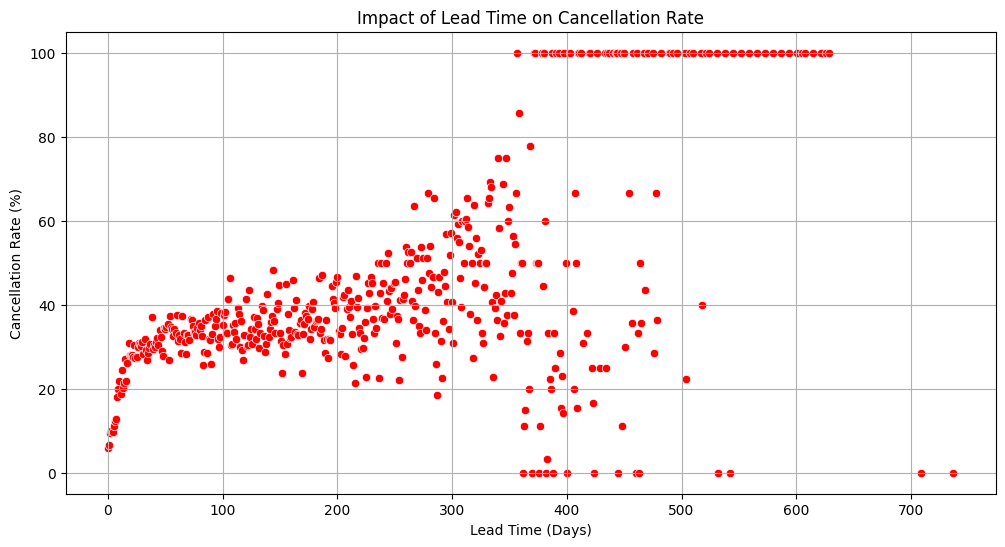

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=lead_time_cancellation.index, y=lead_time_cancellation.values, color='red')

plt.xlabel("Lead Time (Days)")
plt.ylabel("Cancellation Rate (%)")
plt.title("Impact of Lead Time on Cancellation Rate")
plt.grid(True)
plt.show()